https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%202%20-%20Part%202%20-%20Lesson%202%20-%20Notebook.ipynb#scrollTo=RXZT2UsyIVe_

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-12-27 19:08:24--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   115MB/s    in 0.6s    

2020-12-27 19:08:25 (115 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



# Create a Callback

In [106]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.72):
      print("\nReached 72% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

# Prepare the data
Unzip the files, create variables for directores and list of names of these directories

In [13]:
import zipfile
import os
location = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(location, 'r')
zip_ref.extractall('tmp/cats_and_dogs_filtered')

In [14]:
train_cats_dir = os.path.join('/content/tmp/cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats/')
train_dogs_dir = os.path.join('/content/tmp/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs/')
validation_cats_dir = os.path.join('/content/tmp/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/cats/')
validation_dogs_dir = os.path.join('/content/tmp/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/dogs/')


In [15]:
train_cats_names = os.listdir(train_cats_dir)
train_dogs_names = os.listdir(train_dogs_dir)
validation_cats_names = os.listdir(validation_cats_dir)
validation_dogs_names = os.listdir(validation_dogs_dir)

## Inspect the images
`plt.gcf()` Get the Current Figure

In the first cell we define the parameters of the image. The idea is that every time we run the second cell we get different images. For this we first establish the `pic_index` as 0 and then we sum 8 every run of the cell.

Then we create a list for each of the 8 images (with the full path).

`for i, img_path in enumerate(next_cat_pix+next_dog_pix):` It concat the two list in a joined list (first the 8 cats and then the 8 dogs). 

In [38]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
pic_index = 0 # Index for iterating over images

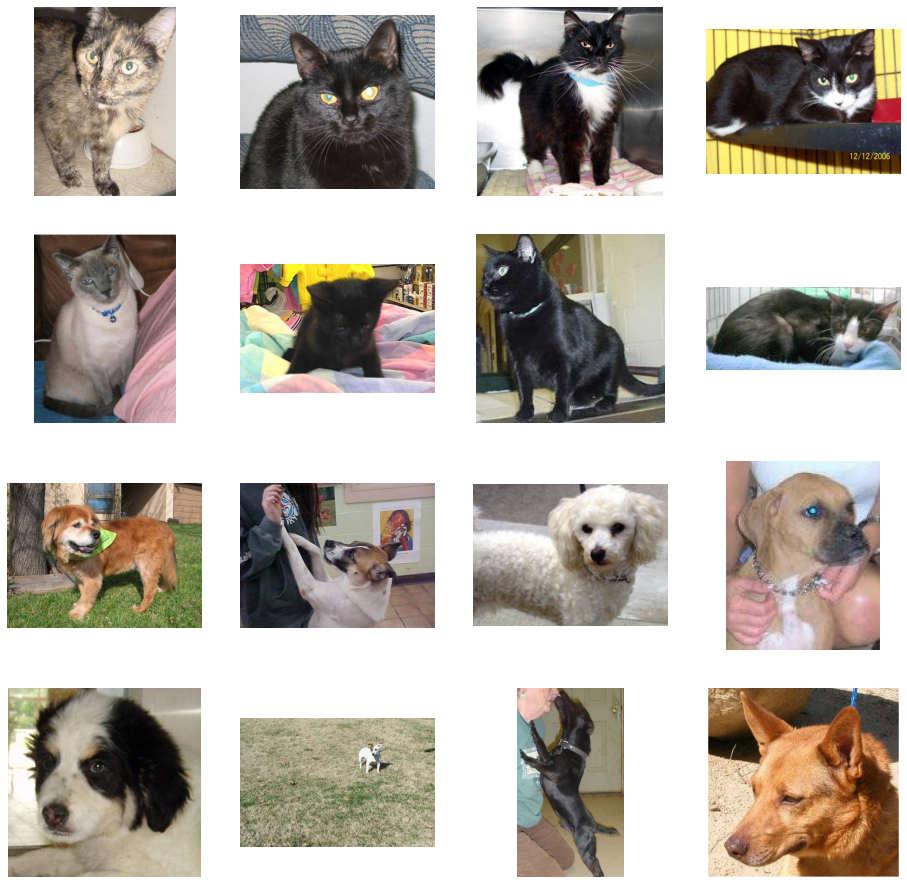

In [55]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cats_names[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in train_dogs_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1) # Set up subplot; subplot indices start at 1
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Define the model
1. Create and compile the model
2. Preprocess the images
3. Train the model

In [16]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [17]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer= RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=["accuracy"])

In [18]:
len(train_cats_names), len(validation_cats_names)

(1000, 500)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_datagen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory('/content/tmp/cats_and_dogs_filtered/cats_and_dogs_filtered/train',
                target_size = (150,150),
                batch_size = 20,
                class_mode = 'binary'
                )
validation_generator = validation_datagen.flow_from_directory('/content/tmp/cats_and_dogs_filtered/cats_and_dogs_filtered/validation',
                target_size = (150,150),
                batch_size = 20,
                class_mode = 'binary'
                )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [109]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch = 100,
    epochs=10,
    validation_steps=50,
    verbose=2,
    callbacks=[callbacks]
)

Epoch 1/10
100/100 - 9s - loss: 0.0652 - accuracy: 0.9910 - val_loss: 2.2310 - val_accuracy: 0.7240

Reached 72% accuracy so cancelling training!


## Check some random samples

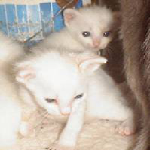

In [102]:
from keras.preprocessing import image
import numpy as np
import random

random_cat = '/content/tmp/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/cats/' + random.choice(validation_cats_names)
random_dog = '/content/tmp/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/dogs/' + random.choice(validation_dogs_names)
list_cat_dog = [random_cat, random_dog]
chosen = random.choice(list_cat_dog)
image_to_predict = image.load_img(chosen, target_size=(150,150))
image_to_predict

In [107]:
x = image.img_to_array(image_to_predict)
x = np.expand_dims(x, axis=0)
classes = model.predict(x)
print(classes)
if classes[0] > 0:
  print('It is a cat')
else:
  print('It is a dog')

[[1.]]
It is a cat
